In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

import pickle

import warnings
warnings.filterwarnings('ignore')

In [79]:
data=pd.read_csv("https://raw.githubusercontent.com/jhhalls/Online-Exam-Ds0124/main/Sales_LinReg.csv")
data.head()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [80]:
data.shape

(305, 6)

In [81]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [82]:
data['Republic']=data['Republic'].fillna(data['Republic'].mean())
data['NDTV']=data['NDTV'].fillna(data['NDTV'].mean())
data['TV9']=data['TV9'].fillna(data['TV9'].mean())
data['AajTak']=data['AajTak'].fillna(data['AajTak'].mean())

In [83]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


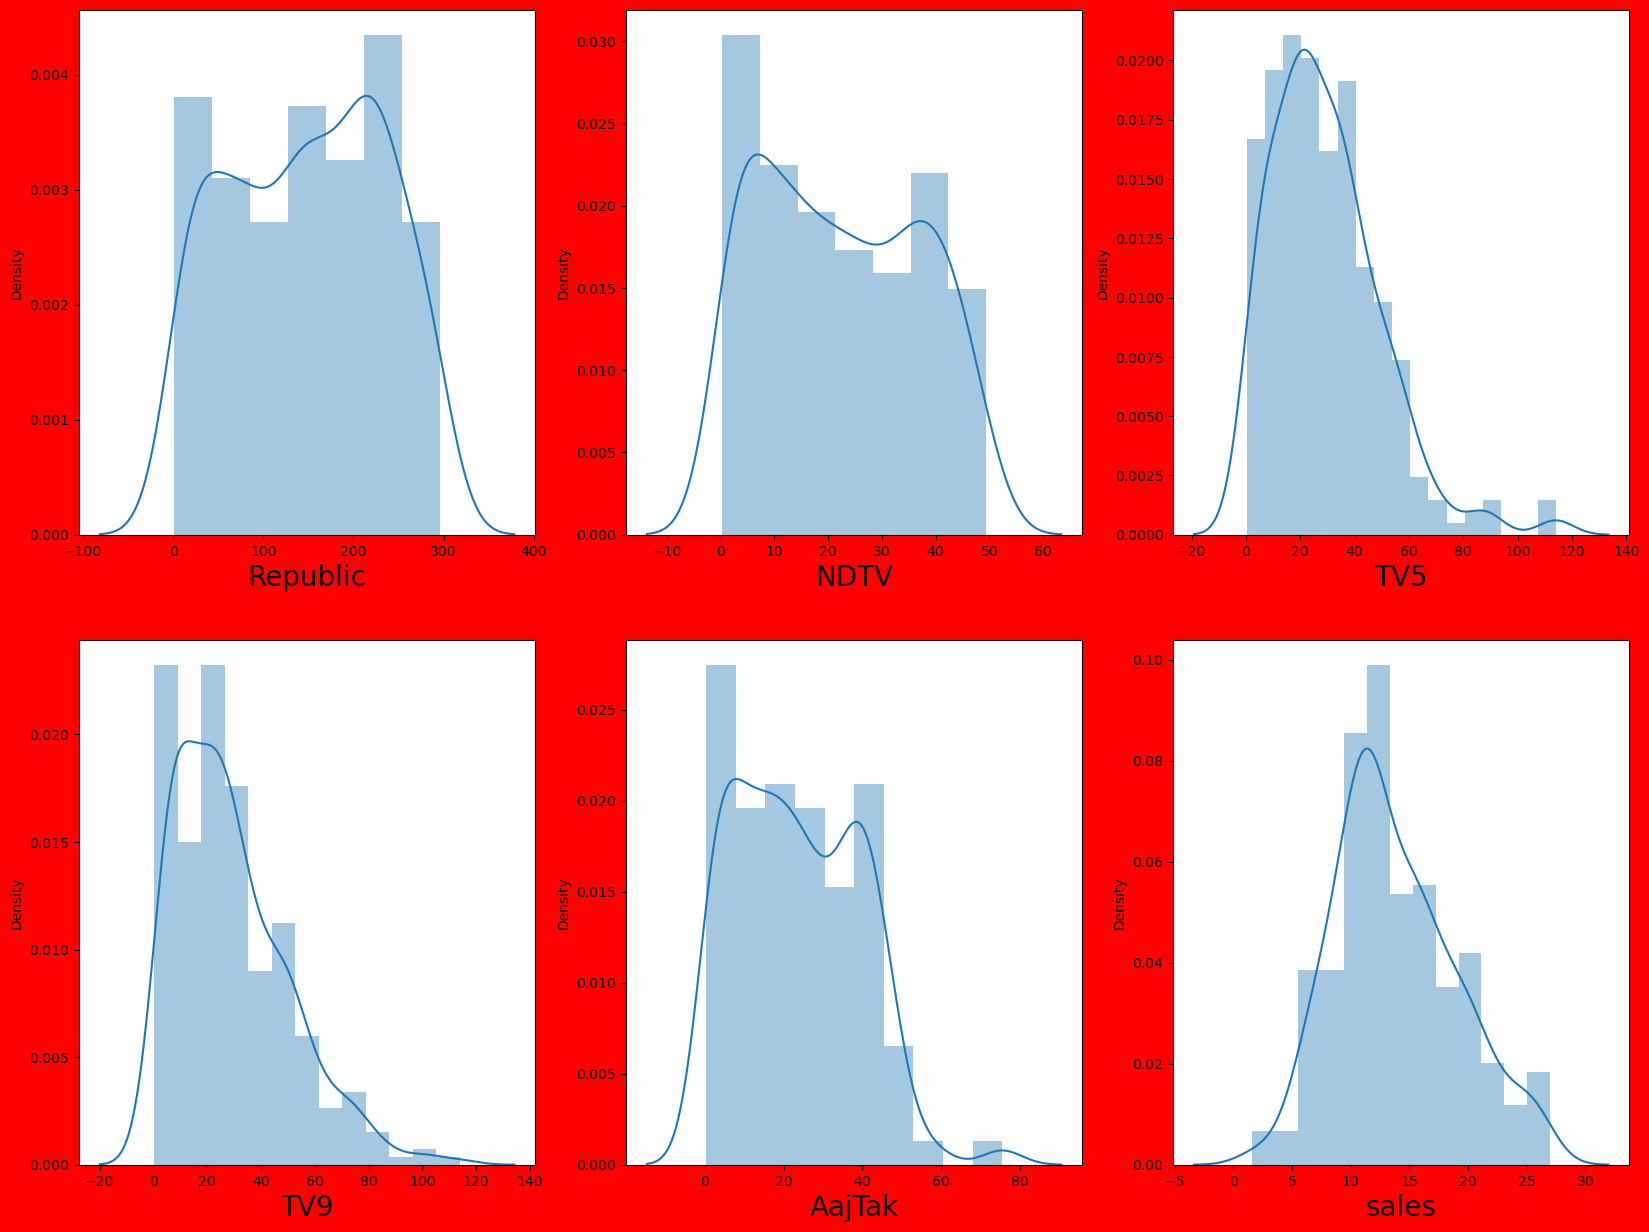

In [84]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

        
        

In [85]:
y=data["sales"]
x=data.drop(columns=["sales"])

In [86]:
y

0       7.2
1      11.8
2      13.2
3       4.8
4      10.6
       ... 
300    15.9
301     6.7
302    10.8
303     9.9
304     5.9
Name: sales, Length: 305, dtype: float64

In [87]:
x

,Republic,NDTV,TV5,TV9,AajTak
0,8.7,48.9,4.0,75.0,49.0
1,57.5,32.8,65.9,23.5,57.5
2,120.2,19.6,7.2,11.6,18.5
3,8.6,2.1,46.0,1.0,2.6
4,199.8,2.6,52.9,21.2,2.9
...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9
301,18.7,12.1,23.7,23.4,18.7
302,39.5,41.1,17.6,5.8,39.5
303,75.5,10.8,8.3,6.0,75.5


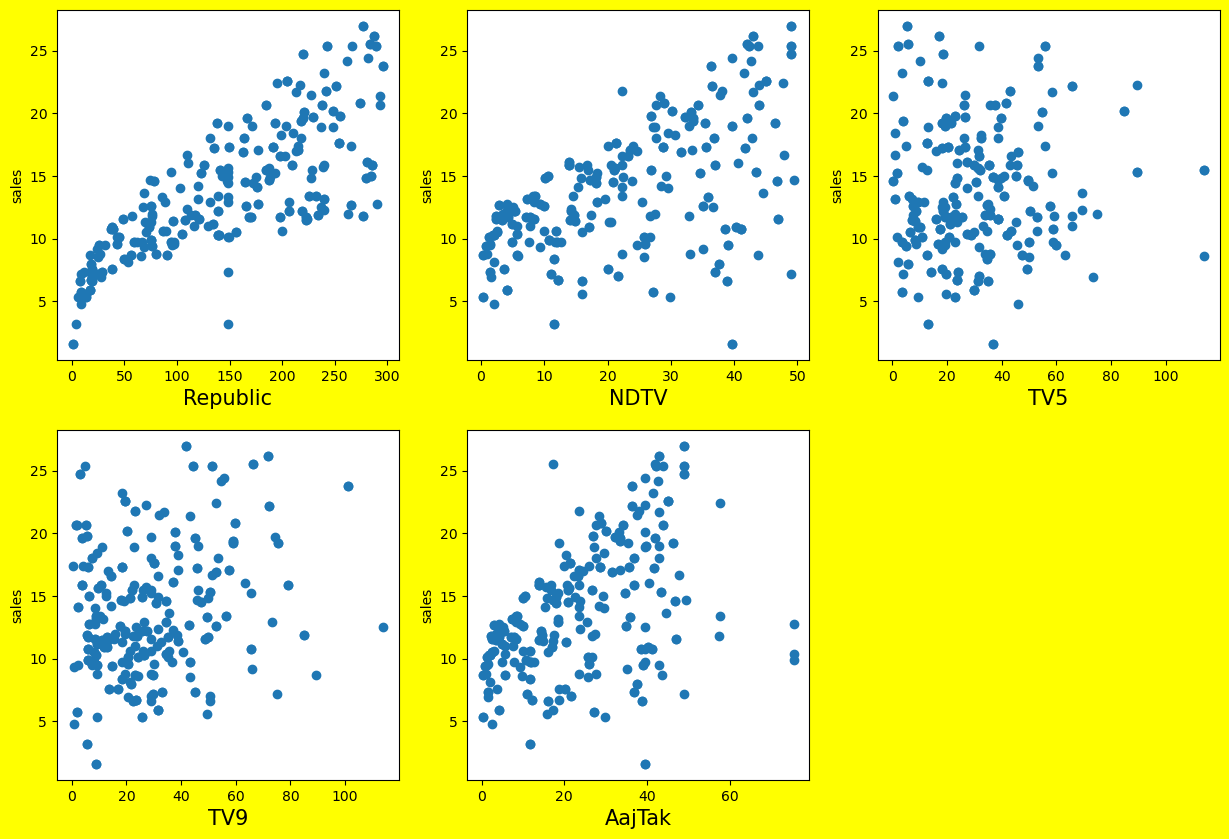

In [91]:
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel("sales",fontsize=10)
        
    plotnumber+=1
plt.show()


In [92]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=220)
y_train.head()

197    23.8
102    12.2
141     3.2
269    11.7
196    11.7
Name: sales, dtype: float64

In [112]:
regression= LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [116]:
data.tail(2)

,Republic,NDTV,TV5,TV9,AajTak,sales
303,75.5,10.8,8.3,6.0,75.5,9.9
304,17.2,4.1,30.0,31.6,17.2,5.9


In [117]:
print('Sales are :' ,regression.predict(scaler.transform([[17.2,4.1,30.0,31.6,17.2 ]])))

Sales are : [4.80646545]


In [118]:
pickle.dump(regression,open('Lreg_model','wb'))

In [100]:
loaded_model=pickle.load(open('Lreg_model','rb'))
                              
z=loaded_model.predict(scaler.transform([[17.2,4.1,30.0,31.6,17.2 ]]))

z                             
                            

array([4.75105628])

In [119]:
regression.score(x_train,y_train)

0.8806985830165007

In [120]:
regression.score(x_test,y_test)

0.8346019102290514

In [121]:
x_test[1]

array([ 0.68536013, -0.95254954, -0.54102228, -0.11675136, -0.96310719])

In [122]:
y_pred=regression.predict(x_test)

In [123]:
y_pred

array([ 8.38227765, 13.55972739, 10.86610716, 10.72312224, 10.84795205,
       10.26185596, 20.71989437, 14.50834451, 13.46747655, 15.55131738,
        9.83409788, 23.80931438, 16.23376607,  9.42389623, 12.77481235,
        9.76159545, 20.68433597, 20.96797522, 12.80938347, 10.07306005,
       18.24615463, 16.89316309,  7.90908013, 14.78878012,  5.69211757,
        6.4346422 , 11.56852327, 12.49220817, 10.01613258, 10.2350181 ,
       22.62547017, 17.32258463, 18.48673405, 18.02755694, 23.09543841,
       18.11885245,  8.72156393,  3.82299345, 15.61787231,  4.52075536,
       12.95663622,  4.49686301, 15.61828533, 16.89316309, 18.10255274,
       10.95354145, 16.48811072, 14.78878012, 10.84795205,  9.62753421,
       19.04575683, 15.09306456,  7.12498384, 17.37445755, 19.05399761,
        9.69934079, 18.40843891, 17.88531856, 14.95292752, 18.91889911,
       12.13201401, 13.70057399, 11.84685451, 10.07002234, 10.38263606,
       12.57311562,  7.42492089, 16.23376607, 15.1163217 ,  6.98

<function matplotlib.pyplot.show(close=None, block=None)>

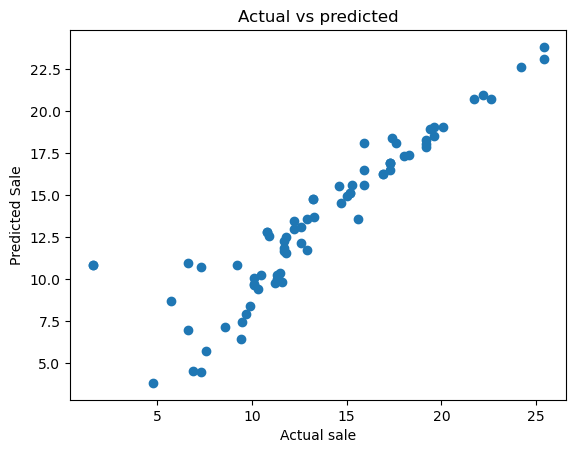

In [124]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual sale")
plt.ylabel("Predicted Sale")

plt.title("Actual vs predicted")
plt.show

In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [126]:
y_pred=regression.predict(x_test)

In [127]:
#MAE
mean_absolute_error(y_test,y_pred)

1.356451604126083

In [128]:
#MSE
mean_absolute_error(y_test,y_pred)

1.356451604126083

In [129]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

2.0528721798680705